In [1]:
!pip install numpy

In [2]:
!pip install pyfits

In [3]:
!pip install astropy

In [4]:
from astropy.io import fits

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [24]:
hdulist=fits.open(r'C:\Users\RajashekarSureka\Desktop\02 10\o9048g0361o.1643627.ch.2317966.XY02.p10.fits')

In [25]:
hdulist.info()

Filename: C:\Users\RajashekarSureka\Desktop\02 10\o9048g0361o.1643627.ch.2317966.XY02.p10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  XY02.hdr      1 PrimaryHDU     622   (2423, 2434)   int16 (rescales to uint16)   


In [8]:
image_data = hdulist[0].data

In [9]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(2434, 2423)


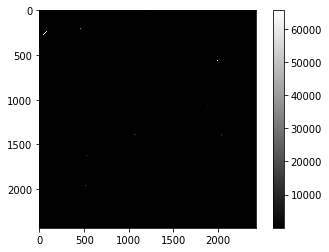

In [11]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

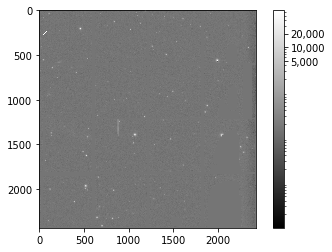

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
hdulist=fits.open(r'C:\Users\RajashekarSureka\Desktop\02 10\o9048g0361o.1643627.ch.2317966.XY02.p10.fits')
image_data = hdulist[0].data
plt.imshow(image_data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [12]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 1
Max: 65535
Mean: 171.50509361294172
Stdev: 602.9070263822309


In [14]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

In [21]:
hdr = hdulist[0].header

In [22]:
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2423 / length of data axis 1                          
NAXIS2  =                 2434 / length of data axis 2                          
BZERO   =               32768. / Scaling: TRUE = BZERO + BSCALE * DISK          
BSCALE  =                   1. / Scaling: TRUE = BZERO + BSCALE * DISK          
DATE-OBS= '2020-07-18T10:57:59.264962' /  UTC start of exposure                 
TIMESYS = 'UTC     '           / Time scale                                     
EQUINOX =                2000. /                                                
EXPTIME =                  45. /  exposure time (sec)                           
OBJCTRA = '21 41 37.447'       / RA of center of the image                      
OBJCTDEC= '-22 43 0.220'    

In [23]:
list(hdr.keys())  

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'BZERO',
 'BSCALE',
 'DATE-OBS',
 'TIMESYS',
 'EQUINOX',
 'EXPTIME',
 'OBJCTRA',
 'OBJCTDEC',
 'CTYPE1',
 'CRVAL1',
 'CRPIX1',
 'CDELT1',
 'CUNIT1',
 'CROTA1',
 'CTYPE2',
 'CRVAL2',
 'CRPIX2',
 'CDELT2',
 'CUNIT2',
 'CROTA2',
 'POSANGLE',
 'EXTEND',
 'COMMENT',
 'COMMENT',
 'NEXTEND',
 'QUEUEID',
 'TESSEL',
 'FILENAME',
 'DATE',
 'IMGSWPRG',
 'IMAGESWV',
 'ORIGIN',
 'INSTRUME',
 'FPPOS',
 'SATTIME',
 'TRKTIME',
 'VDOTIME',
 'COMMENT',
 'COMMENT',
 'NAMPS',
 'DETPKGID',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'DETTEMOV',
 'DETTEADU',
 'DETTCOFA',
 'DETTCOFB',
 'PIXSIZE1',
 'PIXSIZE2',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'COMMENT',
 'IMTM1_1',
 'IMTM1_2',
 'IMTM2_1',
 'IMTM2_2',
 'CELLGAP1',
 'CELLGAP2',
 'CNAXIS1',
 'CNAXIS2',
 'CNPIX1',
 'CNPIX2',
 'CCDBIN1',
 'CCDBIN2',
 'PRESCAN1',
 'PRESCAN2',
 'OVRSCAN1',
 'OVRSCAN2',
 'COMMENT',
 'COMMENT',
 'DETSIZE',
 'COM

In [26]:
print(image_data[1,4])

160


In [34]:
hdulist.close()

In [33]:
pip install photutils

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
from photutils import datasets
hdu = datasets.load_star_image()
image = hdu.data[500:700, 500:700].astype(float) 

In [38]:
image -= np.median(image)  

In [44]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image)  
daofind = DAOStarFinder(fwhm=4., threshold=3.*bkg_sigma)  
sources = daofind(image)  
for col in sources.colnames:
    sources[col].info.format
print(sources)  

 id     xcentroid      ...        flux                mag        
--- ------------------ ... ------------------ -------------------
  1  182.8386589381308 ... 2.8028345946879707 -1.1189936731075838
  2 189.20430813403388 ...  3.872918503107538 -1.4700958958197927
  3  5.794649114329248 ...  4.102910729401173 -1.5327301693669297
  4  36.84706278043581 ...  7.431581787925169 -2.1777031544059704
  5 3.2565602452007374 ... 3.8126298407374812   -1.45306160672686
  6  10.26803781170568 ... 2.8472516694584065  -1.136064640668965
  7  93.55642386118626 ...  7.035617053330399  -2.118255482253661
  8  5.738055675108882 ...  2.720181829591991 -1.0864948381637223
  9 19.136489287273047 ... 2.7049517699042482 -1.0803988147791297
 10  55.05200180542786 ...  2.913991087963302 -1.1612205480167412
...                ... ...                ...                 ...
142 141.91144641264216 ... 4.0809956360864375  -1.526915325928158
143 171.90254459017993 ...  7.953370383435288  -2.251378019358536
144   77.2

In [51]:
from photutils import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=4.)  
phot_table = aperture_photometry(image, apertures)  
for col in phot_table.colnames:
    phot_table[col].info.format
print(phot_table)  

 id      xcenter             ycenter          aperture_sum   
           pix                 pix                           
--- ------------------ ------------------- ------------------
  1  182.8386589381308 0.16767019053693757 18121.759483734317
  2 189.20430813403388  0.2608135253376656 29836.515215754254
  3  5.794649114329248   2.612542408073546 331979.81903687876
  4  36.84706278043581   1.322022795815325 183705.09328388222
  5 3.2565602452007374    5.41895201747651 349468.97862714896
  6  10.26803781170568   5.399920376265883   261533.368195882
  7  93.55642386118626  7.3860241924522425  66815.03042521574
  8  5.738055675108882   7.515223913817501 363004.57147501863
  9 19.136489287273047   9.040661952555341  49273.92926057474
 10  55.05200180542786  11.353115864653937 380132.87852995284
...                ...                 ...                ...
143 171.90254459017993  183.06103281058347  47904.41934710807
144   77.2481986348501  184.02734640546404   54903.4170296746
145 14.5

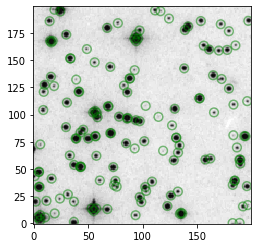

In [52]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='green', lw=1.5, alpha=0.5)